In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for modeling
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/yinmialas/Desktop/dspt7_u4_spotify_proyect/archive_data1/SpotifyAudioFeaturesApril2019.csv')
print(df.shape)
df.head()

(130663, 17)


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


# Exploratory Data Analysis

In [3]:
df.shape

(130663, 17)

In [4]:
# grouping songs by artist_name to see how features compare amongst different artist_name
groupby_artist_name = df.groupby(['artist_name'])
artist_musical_attributes = groupby_artist_name.mean()

artist_musical_attributes

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
artist_name,,,,,,,,,,,,,,
!!!,0.145301,0.743250,233169.750000,0.6942,0.644549,5.750000,0.132538,-9.973500,0.375,0.054637,124.25275,4.000000,0.469087,23.250000
"""Calendar Girls"" Original London Cast",0.669000,0.415000,443813.000000,0.3910,0.000000,6.000000,0.052900,-6.777000,1.000,0.049000,90.60400,4.000000,0.458000,28.000000
"""Elena Of Avalor"" Cast",0.306000,0.624000,154905.000000,0.6230,0.000000,5.000000,0.158000,-4.964000,1.000,0.034800,92.97500,4.000000,0.329000,25.000000
"""Puppy Dog Pals"" Cast",0.124600,0.752333,54484.333333,0.8000,0.000168,4.333333,0.235967,-4.961667,1.000,0.111667,136.10800,3.666667,0.918000,30.333333
"""Weird Al"" Yankovic",0.086100,0.497000,300682.000000,0.7400,0.000034,7.000000,0.213000,-6.638000,1.000,0.210000,151.19200,4.000000,0.929000,48.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
허니비,0.538000,0.774000,195745.000000,0.5370,0.000000,4.000000,0.112000,-4.297000,0.000,0.082200,100.02400,4.000000,0.698000,9.000000
홍단소녀,0.133000,0.786000,202531.000000,0.8720,0.000000,7.000000,0.121000,-2.568000,1.000,0.068100,122.03200,4.000000,0.816000,29.000000
훈남쓰,0.070500,0.701000,213452.000000,0.9050,0.000000,11.000000,0.218000,-2.683000,0.000,0.036100,105.98800,4.000000,0.396000,36.000000


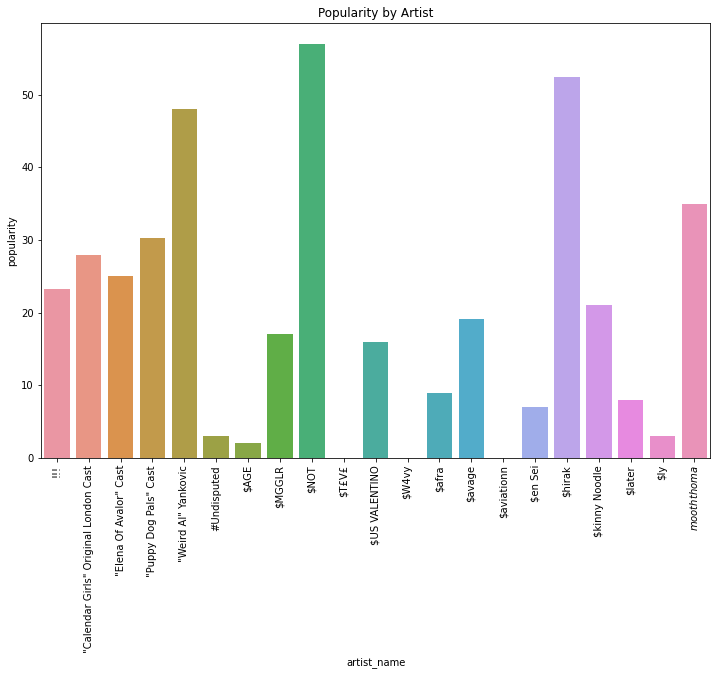

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Popularity by Artist');
popchart = sns.barplot(x=artist_musical_attributes[:21].index, y=artist_musical_attributes[:21].popularity);
popchart.set_xticklabels(labels = artist_musical_attributes[:21].index, rotation=90);

figure1 = popchart.get_figure()

# Train-Test Split

In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=48)

# Scale Features for Clustering:

In [7]:
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [8]:
scaleCols = ['acousticness', 'duration_ms', 'danceability', 'energy', 'instrumentalness',
             'key', 'liveness', 'loudness', 'speechiness', 'tempo','valence','time_signature', 'mode', 'popularity']

scaler = StandardScaler()

In [9]:
train_scaled = scaler.fit_transform(df[scaleCols])
train_scaled

array([[-0.97408012,  0.20900459,  0.84982596, ...,  0.23525146,
         0.8033948 , -0.46715031],
       [-0.92032465,  0.01759476,  1.39171405, ...,  0.23525146,
         0.8033948 , -1.22806504],
       [-0.91858874, -0.59859825,  0.11327905, ...,  0.23525146,
        -1.24471803,  1.61268329],
       ...,
       [-0.03616588, -0.59634092,  0.71303868, ...,  0.23525146,
        -1.24471803,  1.15613445],
       [-0.96806228, -0.26487136,  1.00239639, ...,  0.23525146,
        -1.24471803,  1.3083174 ],
       [ 0.59744266, -0.54245743,  0.70251658, ..., -1.708757  ,
         0.8033948 ,  1.56195565]])

In [33]:
train_scaled_df = pd.DataFrame(train_scaled, columns=scaleCols)
print(train_scaled_df.shape)
train_scaled_df.head()


(130663, 14)


In [36]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness',
             'key', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'mode']
train_scaled_df3 = pd.DataFrame(train_scaled_df, columns=columns)
train_scaled_df3.to_csv("train_scaled_df3.csv", index=False)

In [13]:
train_scaled_df['index'] = np.arange(1, len(train_scaled_df)+1)
df['index'] = np.arange(1, len(df)+1)

In [17]:
train_id = df[['index','artist_name','track_name','track_id']]

train_id

,index,artist_name,track_name,track_id
0,1,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",2RM4jf1Xa9zPgMGRDiht8O
1,2,YG,BAND DRUM (feat. A$AP Rocky),1tHDG53xJNGsItRA3vfVgs
2,3,R3HAB,Radio Silence,6Wosx2euFPMT14UXiWudMy
3,4,Chris Cooq,Lactose,3J2Jpw61sO7l6Hc7qdYV91
4,5,Chris Cooq,Same - Original mix,2jbYvQCyPgX3CdmAzeVeuS
...,...,...,...,...
130658,130659,Calum Scott,Come Back Home,0cvfSKcm9VeduwyYPrxtLx
130659,130660,Saint Claire,Enough for You,43MP9F7UzvfilSrw2SqZGJ
130660,130661,Mike Stud,Do It,4TWlUuFk81NGUNKwndyS5Q
130661,130662,D Savage,No Smoke,5iGBXzOoRo4sBTy8wdzMyK


In [18]:
train_new = pd.merge(train_scaled_df, train_id, how='left', on='index')
train_new

,acousticness,duration_ms,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,time_signature,mode,popularity,index,artist_name,track_name,track_id
0,-0.974080,0.209005,0.849826,-0.884312,-0.621709,-1.174649,-0.677783,0.350838,2.388752,2.800232,-1.241440,0.235251,0.803395,-0.467150,1,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",2RM4jf1Xa9zPgMGRDiht8O
1,-0.920325,0.017595,1.391714,-0.046852,-0.621709,0.768345,0.543208,0.414862,2.774832,1.310884,-0.264902,0.235251,0.803395,-1.228065,2,YG,BAND DRUM (feat. A$AP Rocky),1tHDG53xJNGsItRA3vfVgs
2,-0.918589,-0.598598,0.113279,0.590848,-0.621709,1.045915,-0.670628,0.624050,-0.535807,-0.149450,-0.222443,0.235251,-1.244718,1.612683,3,R3HAB,Radio Silence,6Wosx2euFPMT14UXiWudMy
3,-0.905859,-0.708476,1.149706,0.037663,1.909328,-0.064367,-0.569277,-0.327610,-0.337136,0.117033,0.777254,0.235251,-1.244718,-1.228065,4,Chris Cooq,Lactose,3J2Jpw61sO7l6Hc7qdYV91
4,-0.990817,-0.719560,1.060268,0.855916,1.814969,0.490774,-0.963952,-0.046299,-0.369310,0.019020,1.885026,0.235251,0.803395,-1.228065,5,Chris Cooq,Same - Original mix,2jbYvQCyPgX3CdmAzeVeuS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,-0.971303,-0.179402,0.102757,0.890490,-0.621709,1.601056,-0.571065,0.733458,-0.641175,0.383814,-0.581408,0.235251,0.803395,1.663411,130659,Calum Scott,Come Back Home,0cvfSKcm9VeduwyYPrxtLx
130659,1.665030,-0.146565,-1.023108,-1.230053,-0.621709,1.045915,-0.547814,-0.497986,-0.549481,-0.843327,-0.361397,0.235251,0.803395,1.815594,130660,Saint Claire,Enough for You,43MP9F7UzvfilSrw2SqZGJ
130660,-0.036166,-0.596341,0.713039,-0.142891,-0.621709,0.768345,-0.567488,0.248001,0.755954,1.243509,0.410569,0.235251,-1.244718,1.156134,130661,Mike Stud,Do It,4TWlUuFk81NGUNKwndyS5Q
130661,-0.968062,-0.264871,1.002396,-0.227405,-0.621709,-0.341938,-0.380882,0.046453,0.064226,0.019087,-1.405483,0.235251,-1.244718,1.308317,130662,D Savage,No Smoke,5iGBXzOoRo4sBTy8wdzMyK


In [20]:
train_new.shape, df.shape

((130663, 18), (130663, 18))

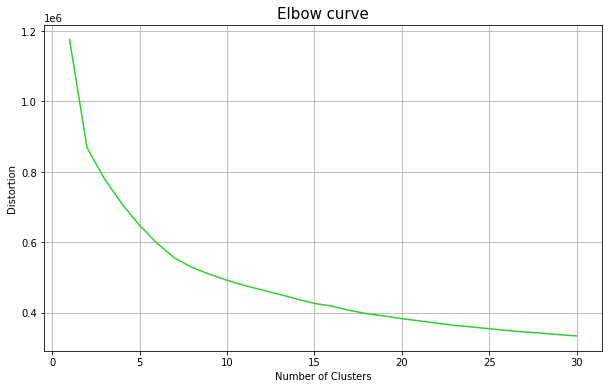

In [21]:
clusterCols = ['acousticness', 'danceability', 'energy', 'instrumentalness',
              'liveness', 'loudness', 'speechiness', 'tempo','valence'] #variables to cluster

distortion = list()
for k in range(1, 31): #started with range [1, 51] and narrowed down to this range 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train_new.loc[:, clusterCols])
    distortion.append(kmeans.inertia_) #append distortion value to list

#plot elbow curves 
fig = plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), distortion, c = 'limegreen', label = 'distortion')
plt.xlabel('Number of Clusters', fontsize = 10)
plt.ylabel('Distortion', fontsize = 10)
plt.grid(True)
plt.title('Elbow curve', fontsize = 15)
plt.show()

based on the elbow , it looks like about 2-17 clusters

# Modeling with Nearest Neighbors

In [22]:
nneigh = NearestNeighbors(n_neighbors=10)

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
              'liveness', 'loudness', 'speechiness', 'tempo','valence']

X = train_new[features].values

nneigh.fit(X)

NearestNeighbors(n_neighbors=10)

In [23]:
X.shape

(130663, 9)

In [25]:
# test on 1 song
test_song = X[10000]

distance, neighbors = nneigh.kneighbors(np.array([test_song]))
distance, neighbors

(array([[0.        , 0.41475923, 0.47675599, 0.49668438, 0.54750066,
         0.55829254, 0.57806338, 0.58422655, 0.59231814, 0.59343087]]),
 array([[ 10000, 121603,  15575, 115774,  96070,  32119,  56414,  19206,
          68684,  92750]]))

In [26]:
train_new.iloc[10000]

acousticness                     -0.933055
duration_ms                        1.71043
danceability                     -0.339171
energy                           -0.511681
instrumentalness                 -0.280352
key                                1.32349
liveness                         -0.819079
loudness                          0.219274
speechiness                      -0.663696
tempo                             -1.31107
valence                            -1.1295
time_signature                    0.235251
mode                              0.803395
popularity                         1.05468
index                                10001
artist_name                        Lo Moon
track_name                        Loveless
track_id            1lN6FVRdpvwYVHi6LqMA1U
Name: 10000, dtype: object

In [29]:
df.to_csv('df.csv', index=True)

In [28]:
train_new.to_csv("train_new.csv", index=True)

In [34]:
df2 = df['track_id']
df2
df2.to_csv("df2.csv", index=False)

In [27]:
song_list = []
for item in neighbors[0][1:]: # this way excludes itself
    row = df.iloc[item]
    song_list.append((row.artist_name, row.track_name))
print(song_list)

[('Tyler, The Creator', 'When Gloves Come Off (feat. Ryan Beatty)'), ('Vacations', 'Telephones'), ('Disturbed', 'Already Gone'), ('Alanis Morissette', 'Flinch'), ('Alfonzo Blackwell', 'As the Days Go by...'), ('Ooyy', 'Genesis'), ('Elevation Worship', 'Lo Harás Otra Vez (Do It Again)'), ('CMA', 'Into the Lights'), ('Lauren Jenkins', "Maker's Mark And You")]
